# Персонализация предложений постоянным клиентам

# Описание проекта

Интернет-магазин `«В один клик»` продаёт разные товары: `для детей`, `для дома`, `мелкую бытовую технику`, `косметику` и даже `продукты`. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. `Возможный выход — удерживать активность постоянных клиентов.` Сделать это можно с помощью персонализированных предложений.

`«В один клик»` — современная компания, поэтому её руководство не хочет принимать решения просто так — только на основе анализа данных и бизнес-моделирования. У компании есть небольшой отдел цифровых технологий, и нам предстоит побыть в роли стажёра в этом отделе.

Итак, нашему отделу нужно **разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.**

# Как решать задачу

1. Нужно промаркировать уровень финансовой активности постоянных покупателей. В компании принято выделять два уровня активности: «снизилась», если клиент стал покупать меньше товаров, и «прежний уровень».

2. Нужно собрать данные по клиентам по следующим группам:
 - Признаки, которые описывают коммуникацию сотрудников компании с клиентом.
 - Признаки, которые описывают продуктовое поведение покупателя. Например, какие товары покупает и как часто.
 - Признаки, которые описывают покупательское поведение клиента. Например, сколько тратил в магазине.
 - Признаки, которые описывают поведение покупателя на сайте. Например, как много страниц просматривает и сколько времени проводит на сайте.

3. Нужно построить модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца.

В исследование нужно включить дополнительные данные финансового департамента о прибыльности клиента: какой доход каждый покупатель приносил компании за последние три месяца.
Используя данные модели и данные о прибыльности клиентов, нужно выделить сегменты покупателей и разработать для них персонализированные предложения.

# Описание данных

`market_file.csv`

**Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.**
 - `id` — номер покупателя в корпоративной базе данных.
Покупательская активность — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
 - `Тип сервиса` — уровень сервиса, например «премиум» и «стандарт».
 - `Разрешить сообщать` — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
 - `Маркет_актив_6_мес` — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
 - `Маркет_актив_тек_мес` — количество маркетинговых коммуникаций в текущем месяце.
 - `Длительность` — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
 - `Акционные_покупки` — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
 - `Популярная_категория` — самая популярная категория товаров у покупателя за последние 6 месяцев.
 - `Средний_просмотр_категорий_за_визит` — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
 - `Неоплаченные_продукты_штук_квартал` — общее число неоплаченных товаров в корзине за последние 3 месяца.
 - `Ошибка_сервиса` — число сбоев, которые коснулись покупателя во время посещения сайта.
 - `Страниц_за_визит` — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.


`market_money.csv`

**Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.**
 - `id` — номер покупателя в корпоративной базе данных.
 - `Период` — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
 - `Выручка` — сумма выручки за период.


`market_time.csv`

**Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.**
 - `id` — номер покупателя в корпоративной базе данных.
 - `Период` — название периода, во время которого зафиксировано общее время.
 - `минут`  — значение времени, проведённого на сайте, в минутах.

`money.csv`

**Таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.**
 - `id` — номер покупателя в корпоративной базе данных.
 - `Прибыль` — значение прибыли.

In [47]:
! pip install shap

In [48]:
! pip install phik

In [49]:
!pip install scikit-learn --upgrade

In [50]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import shap
import phik
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import (
        MinMaxScaler,
        Normalizer,
        OneHotEncoder,
        OrdinalEncoder,
        RobustScaler,
        StandardScaler,
        LabelEncoder)
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import roc_auc_score, accuracy_score

import seaborn as sns
import matplotlib.pyplot as plt

### Шаг 1. Загрузка данных

#### Загрузка данных. Файлы market_file.csv, market_money.csv, market_time.csv, money.csv доступны по ссылкам:
 - /datasets/market_file.csv
 - /datasets/market_money.csv
 - /datasets/market_time.csv
 - /datasets/money.csv
 
***Обратите внимание: в некоторых файлах разделитель значений — точка с запятой, а разделитель десятичных значений — запятая.***  
#### Проверить, что данные в таблицах соответствуют описанию. 

In [51]:
# Выполнение проверки при записи датасетов в переменные
try:
    df_market = pd.read_csv('/datasets/market_file.csv')
    df_market_money = pd.read_csv('/datasets/market_money.csv')
    df_market_time = pd.read_csv('/datasets/market_time.csv')
    df_money = pd.read_csv('/datasets/money.csv', sep=';')
except:
    df_market = pd.read_csv('/market_file.csv')
    df_market_money = pd.read_csv('/market_money.csv')
    df_market_time = pd.read_csv('/market_time.csv')
    df_money = pd.read_csv('/money.csv', sep=';')

### Шаг 2. Предобработка данных

#### Провести необходимую предобработку данных. Названия столбцов можно оставить кириллическими.

In [52]:
# Создаем два списка с названиями датасетов и их нназваниями
df_check = [df_market, df_market_money, df_market_time, df_money]
df_name = ['df_market', 'df_market_money', 'df_market_time', 'df_money']

In [53]:
# Функция проверки общей информации датасетов и вывод первых 5 строк
def check_all_info(dfs, df_name):
    for df, name in zip(dfs, df_name): # Перебираем пары (df, name)
        print(f'Информация по {name}')
        print()
        print(f'Общая информация: \n{df.info()}') # Вывод общей информации о данных
        print()
        print(f'Статистическая информация по датасету: \n{df.describe()}') # Статистическая информация датасета
        print()
        print(f'Первые 5 строк датасета: \n{df.head()}')
        print()

In [54]:
df_money['Прибыль'] = df_money['Прибыль'].str.strip().str.replace(',', '.')
df_money['Прибыль'] = df_money['Прибыль'].astype('float')

In [55]:
# Преобразование всех названий столбцов к нижнему регистру и замена пробелов на подчеркивания
df_market.columns = df_market.columns.str.lower().str.replace(' ', '_')
df_market_money.columns = df_market_money.columns.str.lower().str.replace(' ', '_')
df_market_time.columns = df_market_time.columns.str.lower().str.replace(' ', '_')
df_money.columns = df_money.columns.str.lower().str.replace(' ', '_')

In [56]:
# Функция проверки пропуско и дубликатов
def check_is_nan_dupl(df, df_name):
    for df, name in zip(df, df_name):
        print(f'Датасет {name}:')
        print()
        print(f'Пропуски:\n{df.isna().sum()}')  # Считаем пропуски по каждому столбцу
        print()
        print(f'Дубликаты: {df.duplicated().sum()}')  # Считаем дубликаты
        print()

In [57]:
# Функция очистки данных от аномалий
"""def remove_outliers_iqr(df, column):
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)].copy()"""

'def remove_outliers_iqr(df, column):\n        Q1 = df[column].quantile(0.25)\n        Q3 = df[column].quantile(0.75)\n        IQR = Q3 - Q1\n        lower_bound = Q1 - 1.5 * IQR\n        upper_bound = Q3 + 1.5 * IQR\n        return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)].copy()'

In [58]:
#df_market_clean = remove_outliers_iqr(df_market, 'маркет_актив_6_мес')

In [59]:
#df_market_money_clean = remove_outliers_iqr(df_market_money, 'выручка')

In [60]:
df_market_clean = df_market

In [61]:
df_market_money_clean = df_market_money

In [62]:
# Проверка уникальныз значений и опечаток в них
df_market_clean['тип_сервиса'].unique()

array(['премиум', 'стандартт', 'стандарт'], dtype=object)

In [63]:
df_market_clean['тип_сервиса'] = df_market_clean['тип_сервиса'].replace('стандартт', 'стандарт')

In [64]:
# Удаляем дубликаты
df_market_money_clean = df_market_money_clean.drop_duplicates(subset=['id', 'период'])

In [65]:
df_market_time['период'] = df_market_time['период'].replace('предыдцщий_месяц', 'предыдущий_месяц')

In [66]:
check_all_info(df_check, df_name)

Информация по df_market

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   покупательская_активность            1300 non-null   object 
 2   тип_сервиса                          1300 non-null   object 
 3   разрешить_сообщать                   1300 non-null   object 
 4   маркет_актив_6_мес                   1300 non-null   float64
 5   маркет_актив_тек_мес                 1300 non-null   int64  
 6   длительность                         1300 non-null   int64  
 7   акционные_покупки                    1300 non-null   float64
 8   популярная_категория                 1300 non-null   object 
 9   средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  ошибк

In [67]:
check_is_nan_dupl(df_check, df_name)

Датасет df_market:

Пропуски:
id                                     0
покупательская_активность              0
тип_сервиса                            0
разрешить_сообщать                     0
маркет_актив_6_мес                     0
маркет_актив_тек_мес                   0
длительность                           0
акционные_покупки                      0
популярная_категория                   0
средний_просмотр_категорий_за_визит    0
неоплаченные_продукты_штук_квартал     0
ошибка_сервиса                         0
страниц_за_визит                       0
dtype: int64

Дубликаты: 0

Датасет df_market_money:

Пропуски:
id         0
период     0
выручка    0
dtype: int64

Дубликаты: 0

Датасет df_market_time:

Пропуски:
id        0
период    0
минут     0
dtype: int64

Дубликаты: 0

Датасет df_money:

Пропуски:
id         0
прибыль    0
dtype: int64

Дубликаты: 0



In [68]:
before_count = len(df_market_money_clean)

In [69]:
df_market_money_clean = df_market_money_clean.groupby('id').filter(lambda x: (x['выручка'] > 0).all())

In [70]:
after_count = len(df_market_money_clean)
deleted_count = before_count - after_count
print("Удалено строк:", deleted_count)

Удалено строк: 9


Первичный анализ датасетов показал, что есть одна ошибка в типах данных (в датасете df_money столбец имеет тип object). Он был исправлен на float64 отсутствуют пропущенные значения, нет значений содержащих некорректные значения. Также отсутствуют дубликаты. Статистический метод describe показал, что

# Шаг 3. Исследовательский анализ данных

### Провести исследовательский анализ данных из каждой таблицы. Отбрать клиентов с покупательской активностью не менее трёх месяцев, то есть таких, которые что-либо покупали в этот период. Оформить выводы по результатам шага.

In [71]:
def barplot_sign(df, col1, col2):
    plt.figure(figsize=(8,6), dpi=80)
    sns.barplot(x=df[col1], y=df[col2])
    plt.title(col1)
    plt.xticks(rotation=45, fontsize=8)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()

In [72]:
def boxplot_sns(df, col1, col2):
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=df[col1], y=df[col2])
    plt.title(f'Отношение {col1} к {col2}')
    plt.xlabel(col1)
    plt.xticks(rotation=45, fontsize=10)
    plt.ylabel(col2)
    plt.show()

In [73]:
def hist_quantitative(df, col):
    plt.figure(figsize=(8, 6))
    sns.histplot(data = df, x = col, bins = 10, kde = True)
    plt.title(f'Распределение {col}')
    plt.xlabel(col)
    plt.show()

#### Анализ df_market

In [74]:
# Отбор клиентов с активностью >= 3 месяцев
df_active = df_market_clean[df_market_clean['маркет_актив_6_мес'] >= 3]

print(f"Количество клиентов с активностью >= 3 месяцев: {df_active.shape[0]}")
print(df_active.describe())

Количество клиентов с активностью >= 3 месяцев: 1187
                  id  маркет_актив_6_мес  маркет_актив_тек_мес  длительность  \
count    1187.000000         1187.000000           1187.000000   1187.000000   
mean   216028.491997            4.453159              4.019377    602.925864   
std       365.203700            0.798415              0.698441    251.809324   
min    215348.000000            3.000000              3.000000    110.000000   
25%    215735.500000            3.900000              4.000000    402.500000   
50%    216039.000000            4.300000              4.000000    608.000000   
75%    216341.500000            5.000000              5.000000    811.000000   
max    216647.000000            6.600000              5.000000   1076.000000   

       акционные_покупки  средний_просмотр_категорий_за_визит  \
count        1187.000000                          1187.000000   
mean            0.307127                             3.340354   
std             0.241650       

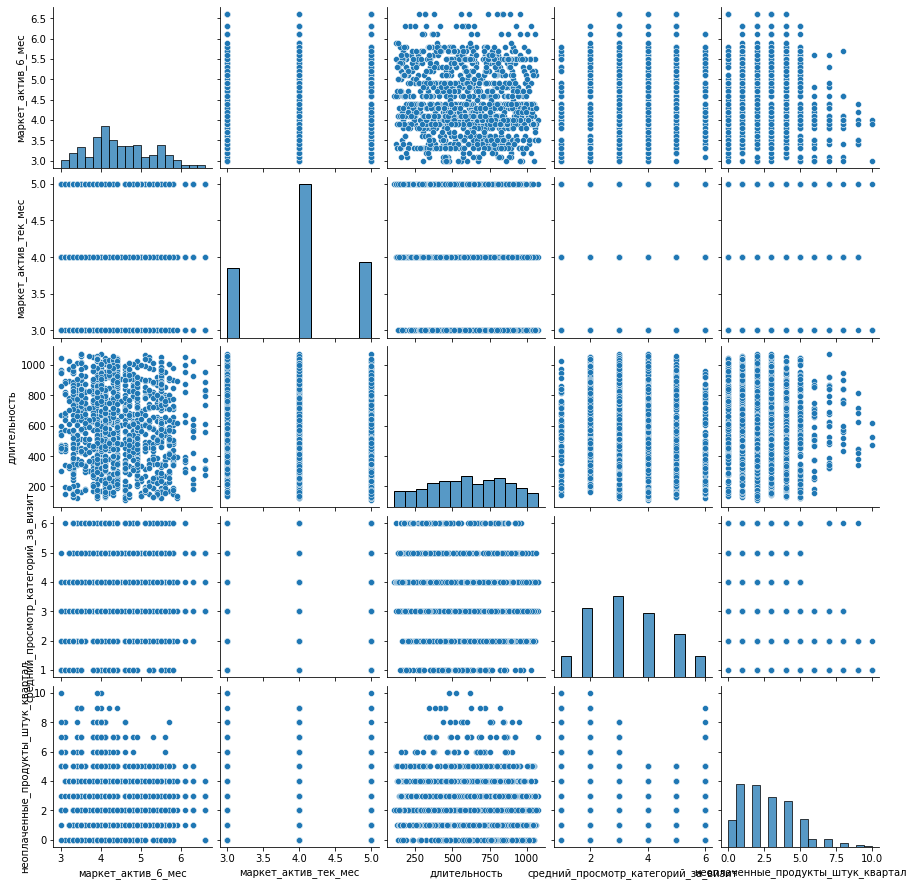

In [75]:
# Распределение числовых признаков
numeric = df_active[['маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность', 'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал']].copy()
sns.pairplot(numeric);

**Маркет_актив_6_мес и Маркет_актив_тек_мес:**

- Наблюдается положительная корреляция между показателями маркетинговой активности за 6 месяцев и за текущий месяц. Это говорит о том, что маркетинговая активность за предыдущие периоды влияет на текущую активность, и пользователи, активно взаимодействовавшие ранее, продолжают быть активными.

**Длительность:**

- Похоже, что длительность имеет слабую связь с другими признаками. На диаграммах рассеивания не наблюдается явно выраженной линейной зависимости между длительностью и другими переменными.
- Распределение длительности показывает большую плотность значений в диапазоне около 0–500, что может означать, что большинство пользователей взаимодействуют с сервисом в этот промежуток времени.

**Средний_просмотр_категорий_за_визит:**

- Имеет некоторое распределение значений с максимумом около 4 просмотров категорий за визит.
- С другими признаками, такими как маркет_актив_6_мес и маркет_актив_тек_мес, видимой корреляции не наблюдается.

**Неоплаченные_продукты_штук_квартал:**

- Наблюдается интересная дискретизация в значениях. Кажется, что данные по этому признаку могут принимать только определенные значения, что может быть связано с бизнес-процессом или особенностями работы сервиса.
- Этот признак также не показывает сильной корреляции с другими признаками.

***Выводы:***

Корреляции между большинством признаков слабые или отсутствуют, за исключением признаков `маркет_актив_6_мес` и `маркет_актив_тек_мес`, которые демонстрируют положительную зависимость. Это указывает на то, что пользователи, активно взаимодействующие ранее, продолжают проявлять активность и в текущем месяце.

`Длительность взаимодействия` и `количество неоплаченных продуктов` имеют слабую связь с другими признаками. Возможно, эти переменные не оказывают значительного влияния на маркетинговую активность и поведение пользователей.

`Средний просмотр категорий` за визит и другие переменные могут потребовать более глубокого анализа для выявления факторов, влияющих на снижение или увеличение покупательской активности.

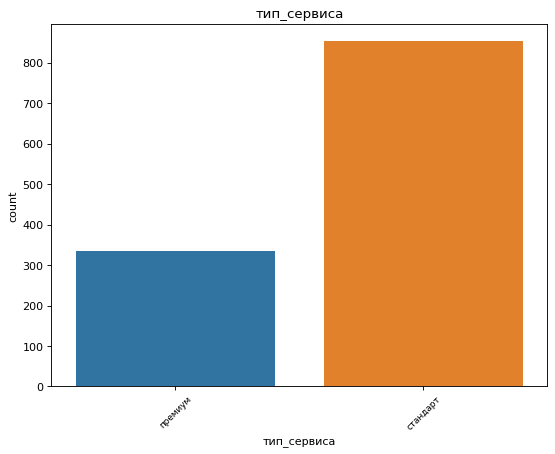

In [76]:
# Распределение по типу сервиса
df_type_service = df_active.groupby('тип_сервиса').agg(count=('тип_сервиса', 'count')).reset_index()
barplot_sign(df_type_service, 'тип_сервиса', 'count')

***Распределение клиентов по типу сервиса:***

- Большинство клиентов используют стандартный сервис.
- Примерно треть клиентов пользуется премиум-сервисом.

**Вывод:** Премиум-сервис используется меньшей частью клиентов, но может быть экономически значимым из-за потенциально более высокой прибыли.

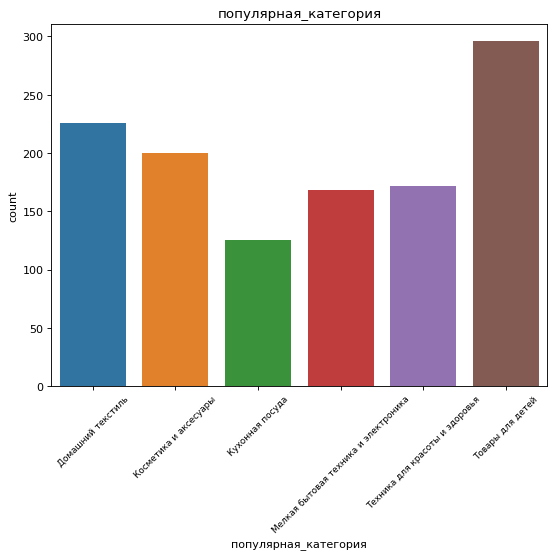

In [77]:
# Распределение по популярным категориям
df_popular_category = df_active.groupby('популярная_категория').agg(count=('популярная_категория', 'count')).reset_index()
barplot_sign(df_popular_category, 'популярная_категория', 'count')

***Самые популярные категории:***

- Лидируют категории: "Домашний текстиль" и "Товары для детей".
- Меньше всего популярна категория "Кухонная посуда".

**Вывод:** Категории "Товары для детей" и "Домашний текстиль" являются ключевыми для анализа и маркетинговых стратегий.

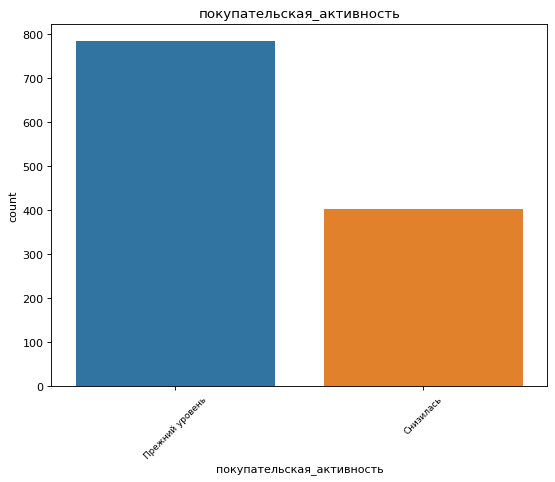

In [78]:
# Распределение покупательской активности
df_activity = df_active.groupby('покупательская_активность').agg(count=('покупательская_активность', 'count')).reset_index()
barplot_sign(df_activity, 'покупательская_активность', 'count')

***Распределение активности:***

- Большинство клиентов имеют прежний уровень активности.
- Снижение активности наблюдается примерно у 50% клиентов.

**Вывод:** Падение активности значимо, требуется анализ причин для улучшения удержания клиентов.

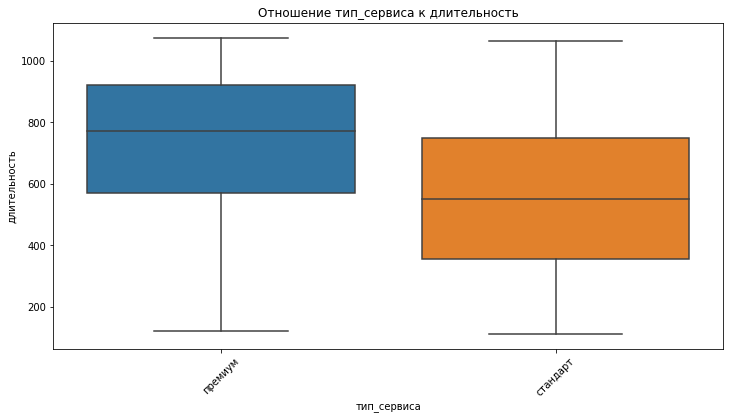

In [79]:
# Связь между типом сервиса и длительностью
boxplot_sns(df_active, 'тип_сервиса', 'длительность')

***Боксплот показывает:***

- У клиентов с премиум-сервисом медианная длительность выше, чем у клиентов со стандартным сервисом.
- Разброс длительности у стандартного сервиса больше.

**Вывод:** Клиенты премиум-сервиса более стабильны в длительности работы, что может указывать на их высокую лояльность.

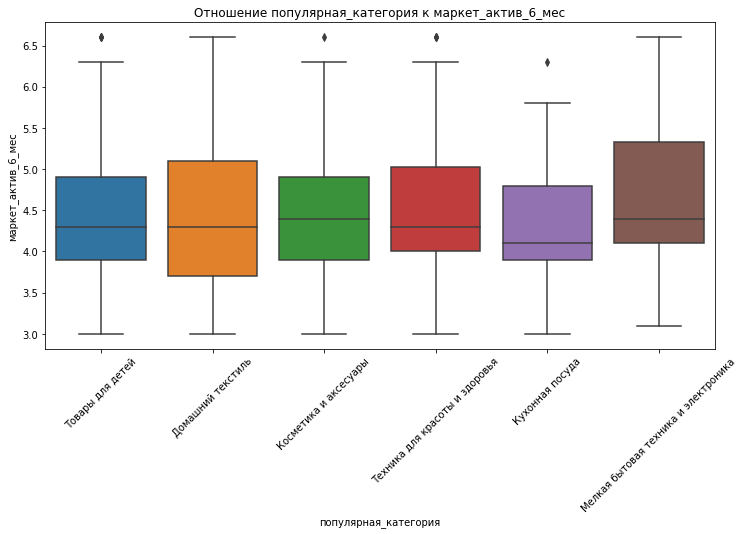

In [80]:
# Связь между популярной категорией и средней активностью
boxplot_sns(df_active, 'популярная_категория', 'маркет_актив_6_мес')

***Боксплот показывает:***

- У категорий "Косметика и аксессуары" и "Техника для красоты и здоровья" медианная активность выше.
- Категория "Кухонная посуда" имеет более низкую медианную активность.

**Вывод:** Категории с высокой активностью могут требовать приоритетного внимания при разработке предложений и акций.

#### Анализ df_market_money

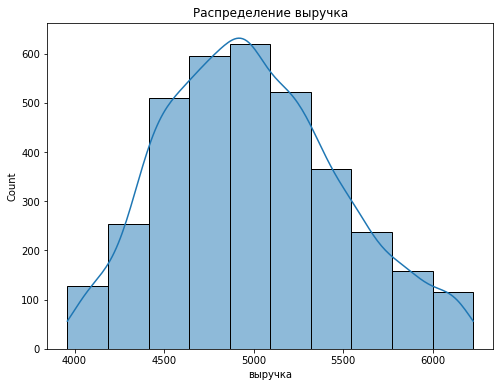

In [81]:
# Распределение выручки
lower_bound = df_market_money_clean['выручка'].quantile(0.05)
upper_bound = df_market_money_clean['выручка'].quantile(0.95)

df_filtered = df_market_money_clean[(df_market_money_clean['выручка'] >= lower_bound) & 
                                    (df_market_money_clean['выручка'] <= upper_bound)]

hist_quantitative(df_filtered, 'выручка')

***Распределение выручки***

 - Распределение выручки близко к нормальному, с некоторой асимметрией в сторону больших значений.
 - Основная масса значений выручки находится в диапазоне 4500–5500.
 - Есть клиенты с выручкой выше 6000, но их немного.

**Вывод:**

 - Большинство клиентов имеют выручку в пределах среднего значения.

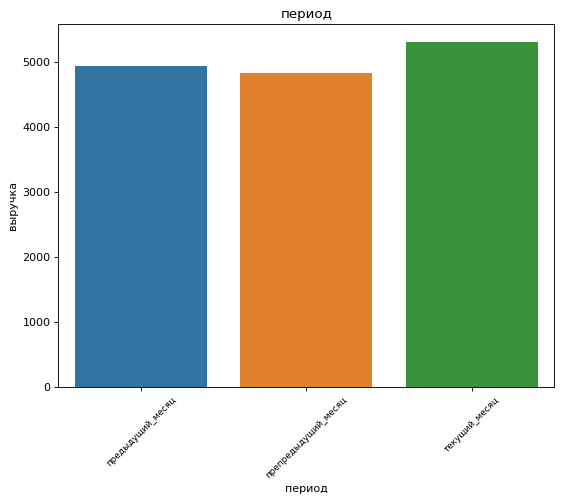

In [82]:
# Выручка по периодам
df_revenue_by_period = df_market_money_clean.groupby('период')['выручка'].mean().reset_index()
barplot_sign(df_revenue_by_period, 'период', 'выручка')

***Выручка по периодам***

 - Средняя выручка за предыдущий и текущий месяц практически одинакова.
 - Различия между периодами минимальны, что говорит об отсутствии значительных изменений в поведении клиентов.

**Вывод:**

 - Выручка стабильна из месяца в месяц, без явных скачков или падений.
 - Возможно, сезонные или внешние факторы не оказывают значительного влияния на поведение клиентов.

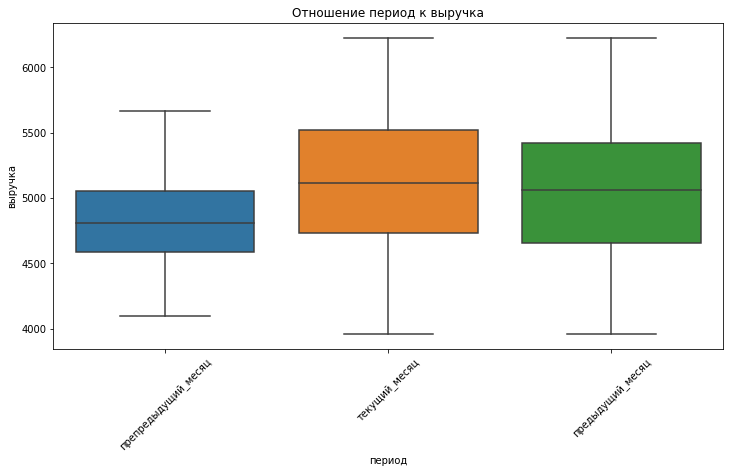

In [83]:
# Боксплот для выручки по периодам
lower_bound = df_market_money_clean['выручка'].quantile(0.05)
upper_bound = df_market_money_clean['выручка'].quantile(0.95)

df_filtered = df_market_money_clean[(df_market_money_clean['выручка'] >= lower_bound) & 
                                    (df_market_money_clean['выручка'] <= upper_bound)]

boxplot_sns(df_filtered, 'период', 'выручка')

***Выручка по периодам***

 - Медианное значение выручки за текущий месяц чуть выше, чем за предыдущий месяц.
 - Разброс выручки в текущем месяце больше, что может указывать на более разнообразное поведение клиентов.
 - Есть выбросы в обоих периодах: как в сторону меньшей выручки, так и в сторону большей.

**Выводы:**

 - В среднем выручка стабильна, но в текущем месяце есть больше значений с высокой выручкой.
 - Выбросы требуют дополнительного анализа: возможно, они связаны с отдельными клиентами, активностями или продуктами.

#### Анализ df_market_time

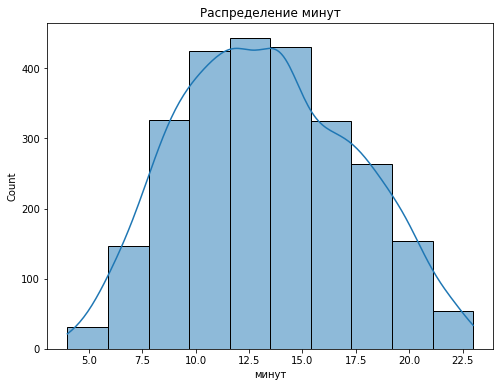

In [84]:
# Распределение времени (минут)
hist_quantitative(df_market_time, 'минут')

***Распределение минут***

 - Время, проведенное клиентами, имеет нормальное распределение с пиком около 12–14 минут.
 - Небольшое количество клиентов проводит значительно больше времени (20+ минут), что можно считать аномалией.

**Выводы:**

 - Среднее время посещения сайта клиентами стабильно и составляет около 13 минут.
 - Клиенты с длительными посещениями могут быть более вовлеченными, либо сталкиваются с трудностями в навигации/поиске.

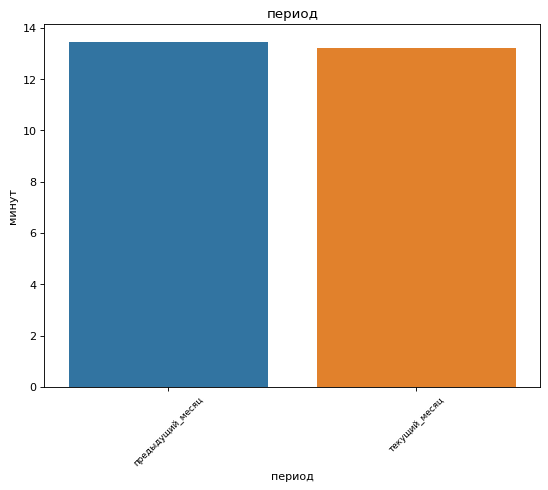

In [85]:
# Среднее время по периодам
df_time_by_period = df_market_time.groupby('период')['минут'].mean().reset_index()
barplot_sign(df_time_by_period, 'период', 'минут')

***Среднее время по периодам***

 - Среднее время, проведенное клиентами, практически одинаково для текущего и предыдущего месяца.
 - Различия между периодами минимальны, что говорит о стабильности поведения клиентов.

**Выводы:**

 - Активность клиентов в плане времени, проведенного на платформе, не претерпела значительных изменений.

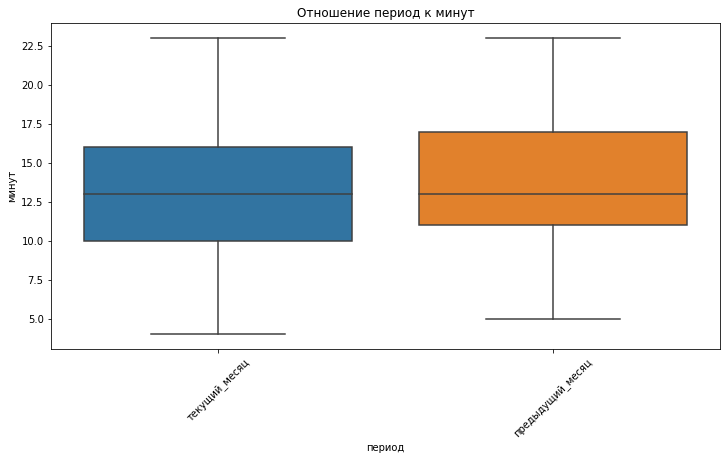

In [86]:
# Боксплот для времени по периодам
boxplot_sns(df_market_time, 'период', 'минут')

***Боксплот для времени по периодам***

 - Медианное время для обоих периодов составляет около 12.5–13 минут.
 - Разброс времени схожий, но в текущем месяце диапазон значений шире.
 - Наблюдаются выбросы в обоих периодах (например, клиенты, проводящие более 20 минут).

**Выводы:**

 - Распределение времени достаточно стабильное, с минимальными отклонениями.
 - Клиенты с выбросами (значительно больше времени) могут быть:
     - Более заинтересованными пользователями (активное изучение продуктов).
     - Испытывающими трудности с навигацией.

#### Анализ df_money

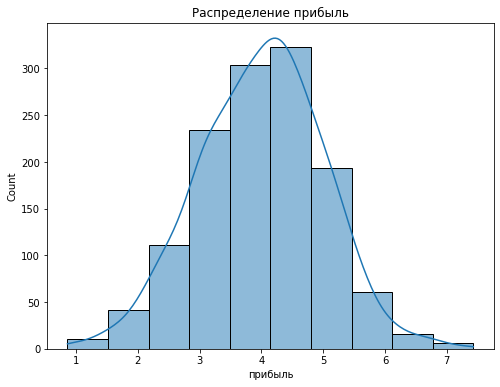

In [87]:
# Распределение прибыли
hist_quantitative(df_money, 'прибыль')

***Распределение прибыли***

 - Распределение прибыли имеет форму, близкую к нормальной, с пиком около значения 4.
 - Большинство клиентов приносят прибыль в диапазоне от 3 до 5.
 - Есть небольшое количество клиентов с низкой (менее 2) и высокой прибылью (более 6).

**Выводы:**

 - Основная масса клиентов приносит стабильную прибыль.
 - Клиенты с высокой прибылью являются ценным сегментом, который требует особого внимания.

In [88]:
# Поиск клиентов с высокой прибылью
high_profit_clients = df_money[df_money['прибыль'] > df_money['прибыль'].quantile(0.75)]
print(f"Количество клиентов с высокой прибылью: {high_profit_clients.shape[0]}")

Количество клиентов с высокой прибылью: 324


**Выводы:**

 - Этот сегмент клиентов можно классифицировать как "высокоприбыльные".
 - Возможно, эти клиенты имеют более высокую покупательскую активность или предпочитают премиум-сегменты товаров/услуг.
 - Выделено 324 клиента с прибылью выше 75-го процентиля.

**Общий вывод по шагу 3**


Распределения количественных признаков показывают нормальное или близкое к нормальному распределение.
Данные имеют выбросы, которые визуализируются на диаграммах размаха. Однако распределения не сильно искажены, что позволяет использовать стандартные методы обработки без сложных преобразований.

Соотношение целевого признака примерно сбалансировано. Распределение категориальных признаков (например, `Тип сервиса`) показывает, что данные содержат разнообразие категорий, что важно для моделей.
Большинство категорий присутствует в достаточном количестве, чтобы избежать проблемы несбалансированного датасета по категориальным данным.


Временные характеристики, такие как `Время на сайте`, имеют чётко выраженные распределения, что позволяет предположить наличие зависимостей между временными затратами клиента и их поведением.


Целевой признак имеет два класса, которые представлены относительно равномерно. Это хорошо для бинарной классификации, поскольку риск смещения модели снижается.


Разделение данных по группам демонстрирует различия в распределении признаков между классами. Например, данные `Акционные покупки` варьируются между классами, что может быть индикатором важности признака.
Взаимосвязь между признаками представлена на диаграммах рассеяния; они подтверждают отсутствие линейной зависимости между большинством пар признаков.

***Выводы:***

- Данные пригодны для обучения моделей машинного обучения. Большинство признаков имеют подходящие распределения, и целевой признак сбалансирован.

- Анализ подтвердил, что мультиколлинеарность в данных незначительна, что упрощает работу с моделями.

- Выбросы в данных присутствуют, но они не являются критическими и могут быть обработаны стандартными методами.

- Категориальные и количественные признаки достаточно разнообразны для извлечения полезной информации при построении моделей.

### Шаг 4. Объединение таблиц

#### Объедините таблицы `market_file.csv`, `market_money.csv`, `market_time.csv`. Данные о прибыли из файла money.csv при моделировании вам не понадобятся. 

#### Учитывайте, что данные о выручке и времени на сайте находятся в одном столбце для всех периодов. В итоговой таблице сделайте отдельный столбец для каждого периода.

In [89]:
# Пивот таблицы с выручкой по периодам
df_market_money_clean_pivot = df_market_money_clean.pivot(index='id', columns='период', values='выручка').reset_index()
df_market_money_clean_pivot.rename(columns={
    'предыдущий_месяц': 'предыдущий_месяц_выручка',
    'препредыдущий_месяц': 'препредыдущий_месяц_выручка',
    'текущий_месяц': 'текущий_месяц_выручка'
}, inplace=True)

In [90]:
# Пивот таблицы с временем по периодам
df_market_time_clean_pivot = df_market_time.pivot(index='id', columns='период', values='минут').reset_index()
df_market_time_clean_pivot.rename(columns={
    'предыдущий_месяц': 'предыдущий_месяц_время',
    'текущий_месяц': 'текущий_месяц_время'
}, inplace=True)

In [91]:
df_final = df_active.merge(
    df_market_money_clean_pivot, on='id', how='left'
).merge(
    df_market_time_clean_pivot, on='id', how='left'
)

In [92]:
df_final = df_final[
    (df_final['предыдущий_месяц_выручка'] > 0) &
    (df_final['препредыдущий_месяц_выручка'] > 0) &
    (df_final['текущий_месяц_выручка'] > 0)
]

In [93]:
df_final.head()

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,предыдущий_месяц_выручка,препредыдущий_месяц_выручка,текущий_месяц_выручка,предыдущий_месяц_время,текущий_месяц_время
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
2,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
3,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
4,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11
5,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10


In [94]:
df_final.isna().sum()

id                                     0
покупательская_активность              0
тип_сервиса                            0
разрешить_сообщать                     0
маркет_актив_6_мес                     0
маркет_актив_тек_мес                   0
длительность                           0
акционные_покупки                      0
популярная_категория                   0
средний_просмотр_категорий_за_визит    0
неоплаченные_продукты_штук_квартал     0
ошибка_сервиса                         0
страниц_за_визит                       0
предыдущий_месяц_выручка               0
препредыдущий_месяц_выручка            0
текущий_месяц_выручка                  0
предыдущий_месяц_время                 0
текущий_месяц_время                    0
dtype: int64

***Вывод по объединению таблиц***

 - Создана итоговая таблица, которая объединяет информацию из разных таблиц: основную информацию о клиентах, данные о выручке за разные периоды и данные о времени, проведенном на сайте.

 - Использован столбец id как общий идентификатор для всех таблиц.
 
 - Для данных о выручке (df_market_money_clean) и времени (df_market_time_clean) выполнена трансформация: периоды (предыдущий_месяц, текущий_месяц) выделены в отдельные столбцы.
 
 - Учет клиентов с покупательской активностью не менее трех месяцев (df_active).
 
 - Столбцы с данными о выручке и времени переименованы для большей ясности.
 
 - Пропущенные значения обработаны (заполнены медианой).
 
 - Применено объединение типа `how='left'`. Были сохранены все клиенты, представленные в основной таблице `df_active`, независимо от наличия дополнительных данных о выручке или времени. Такой подход был выбран для того, чтобы не терять клиентов с неполной информацией, поскольку пропуски в данных о выручке или времени не должны исключать их из анализа.

### Шаг 5. Корреляционный анализ

#### Провести корреляционный анализ признаков в количественной шкале в итоговой таблице для моделирования. Сделать выводы о мультиколлинеарности и при необходимости устраните её.

In [50]:
# Выбираем только количественные признаки из итоговой таблицы
numeric_columns = df_final.select_dtypes(include=['float64', 'int64']).drop(columns=['id']).columns

In [51]:
# Расчет корреляционной матрицы
correlation_matrix = df_final[numeric_columns].corr()

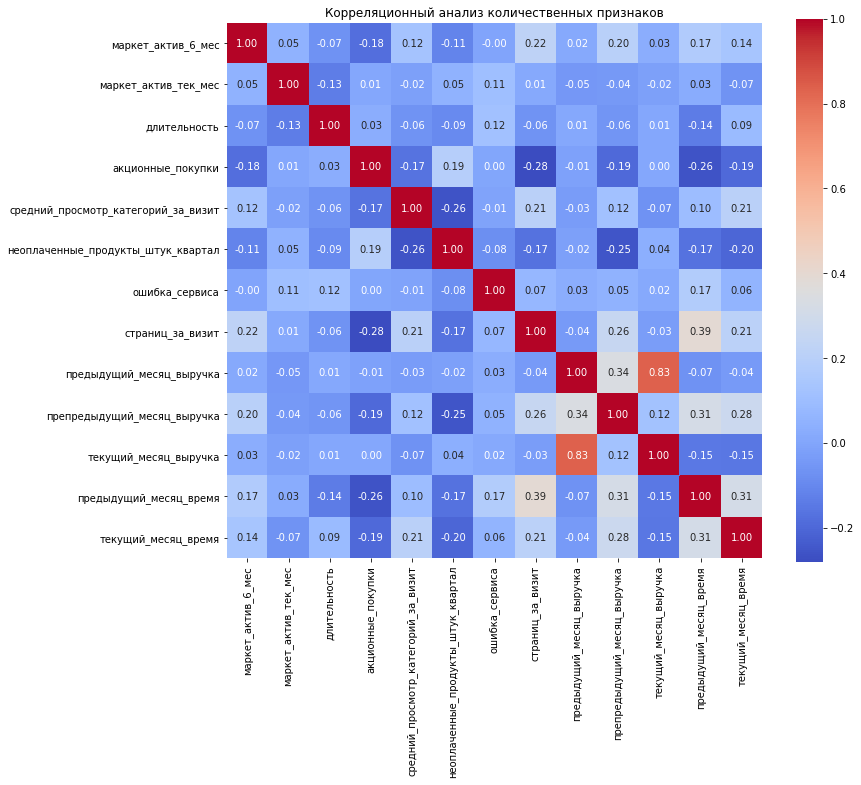

In [52]:
# Визуализация корреляционной матрицы
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Корреляционный анализ количественных признаков')
plt.show()

In [53]:
# Удаляем признаки `id` и `ошибка_сервиса` с высокой корреляцией
df_final_reduced = df_final.drop(columns=['id', 'ошибка_сервиса'])

In [54]:
# Создаем объект для оценки корреляции
phik_matrix = df_final_reduced.phik_matrix(interval_cols=['маркет_актив_6_мес', 
                                                          'длительность', 
                                                          'акционные_покупки', 
                                                          'предыдущий_месяц_выручка', 
                                                          'препредыдущий_месяц_выручка', 
                                                          'текущий_месяц_выручка'])

In [55]:
df_final_reduced.head()

,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,страниц_за_визит,предыдущий_месяц_выручка,препредыдущий_месяц_выручка,текущий_месяц_выручка,предыдущий_месяц_время,текущий_месяц_время
1,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,5,5216.0,4472.0,4971.6,12,10
2,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,5,5457.5,4826.0,5058.4,8,13
3,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,4,6158.0,4793.0,6610.4,11,13
4,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,2,5807.5,4594.0,5872.5,8,11
5,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,4,4738.5,5124.0,5388.5,10,10


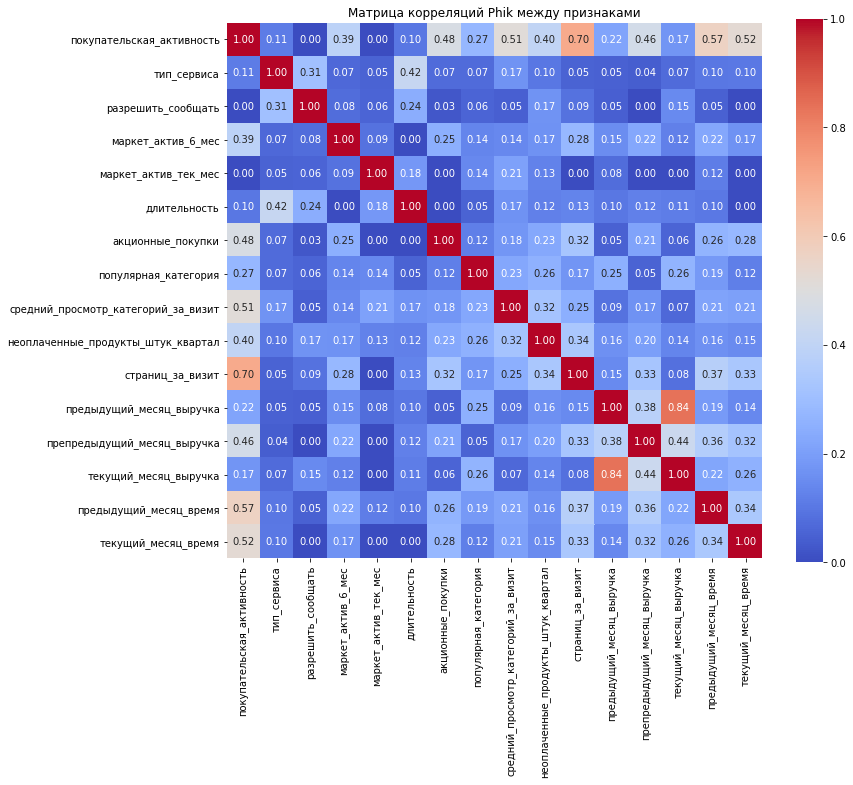

In [56]:
# Визуализация корреляционной матрицы phik
plt.figure(figsize=(12, 10))
sns.heatmap(phik_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Матрица корреляций Phik между признаками')
plt.show()

**Вывод по шагу 5:**

1. Сильные зависимости::

Признак `покупательская_активность` имеет значительные корреляции с несколькими другими признаками:
`страниц_за_визит` - `0.71`: чем больше количество страниц за визит, тем больше покупательская активность.
`предыдущий_месяц_выручка` - `0.57` и `текущий_месяц_время` - `0.53`: это может говорить о важной роли выручки и времени, проведенного пользователем, для покупательской активности.

2. Высокая взаимосвязь между признаками:

`предыдущий_месяц_выручк` и `текущий_месяц_выручка` имеют довольно высокую корреляцию `0.74`. Это вполне ожидаемо, так как выручка в разные месяцы, как правило, имеет определенную взаимосвязь.
`страниц_за_визит` и `покупательская_активность` показывают сильную связь `0.71`, что подразумевает, что активные пользователи обычно просматривают большее количество страниц.

3. Слабые или умеренные корреляции:

Большинство признаков, таких как `разрешить_сообщать`, `маркет_актив_6_мес`, `длительность`, и другие имеют слабую или умеренную корреляцию с покупательской активностью, что может свидетельствовать о меньшей значимости этих признаков для данной задачи.

4. Удаление признаков:

Такие признаки, как `id` и `ошибка_сервиса` были удалены из-за высокой корреляции. Если их оставить, то может возникнуть неустойчивость коэффициентов линейных моделей, из-за чего модель сложно интерпретировать.

***Выводы и рекомендации для моделирования:***

Признаки с высокой корреляцией могут указывать на наличие линейной зависимости и важность этих признаков для модели. 
Признаки с низкой корреляцией, например `акционные_покупки` или `популярная_категория`, скорее всего, имеют меньшее влияние на покупательскую активность и могут быть удалены из модели или использоваться с учетом их низкой значимости.

In [57]:
# df_final_reduced.isna().sum()

In [58]:
"""num_col = ['маркет_актив_6_мес',
            'маркет_актив_тек_мес',
            'длительность',
            'акционные_покупки',
            'средний_просмотр_категорий_за_визит',
            'неоплаченные_продукты_штук_квартал',
            'страниц_за_визит',
            'выручка_предыдущий_месяц',
            'выручка_текущий_месяц',
            'время_предыдущий_месяц',
            'время_текущий_месяц']
num_imputer = SimpleImputer(strategy='median')
df_final_reduced[num_col] = num_imputer.fit_transform(df_final_reduced[num_col])"""

"num_col = ['маркет_актив_6_мес',\n            'маркет_актив_тек_мес',\n            'длительность',\n            'акционные_покупки',\n            'средний_просмотр_категорий_за_визит',\n            'неоплаченные_продукты_штук_квартал',\n            'страниц_за_визит',\n            'выручка_предыдущий_месяц',\n            'выручка_текущий_месяц',\n            'время_предыдущий_месяц',\n            'время_текущий_месяц']\nnum_imputer = SimpleImputer(strategy='median')\ndf_final_reduced[num_col] = num_imputer.fit_transform(df_final_reduced[num_col])"

### Шаг 6. Использование пайплайнов

#### Применить все изученные модели. Для этого используем пайплайны.

In [59]:
RANDOM_STATE = 42
TEST_SIZE = 0.2

In [60]:
X = df_final_reduced.drop(columns='покупательская_активность')
y = df_final_reduced['покупательская_активность']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=RANDOM_STATE,
                                                    test_size=TEST_SIZE,
                                                    stratify = y)

In [62]:
le = LabelEncoder()
le.fit(y_train)

LabelEncoder()

In [63]:
y_train = le.transform(y_train)
y_test = le.transform(y_test)

In [64]:
# Создаём списки с названиями признаков
num_columns = ['маркет_актив_6_мес',
               'маркет_актив_тек_мес',
               'длительность',
               'акционные_покупки',
               'средний_просмотр_категорий_за_визит',
               'неоплаченные_продукты_штук_квартал',
               'страниц_за_визит',
               'предыдущий_месяц_выручка',
               'препредыдущий_месяц_выручка',
               'текущий_месяц_выручка',
               'предыдущий_месяц_время',
               'текущий_месяц_время']
ohe_columns = ['популярная_категория']
ord_columns = ['тип_сервиса', 'разрешить_сообщать']

In [65]:
# Создаём пайплайн для подготовки признаков из списка num_columns
num_pipe = Pipeline(steps=[
    ('scaler', StandardScaler())
])

In [66]:
# Создаём пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование
# SimpleImputer + OHE
ohe_pipe = Pipeline(steps=[
    (
        'simpleImputer_ohe', SimpleImputer(strategy='most_frequent')
    ),
    (
        'ohe', OneHotEncoder(handle_unknown='ignore', drop='first', categories='auto')
    )
])

In [67]:
# Создаём пайплайн для подготовки признаков из списка ord_columns: заполнение пропусков и Ordinal-кодирование
# SimpleImputer + OE
ord_pipe = Pipeline([
    (
        'simpleImputer_ord', SimpleImputer(strategy='most_frequent')
    ),
    (
        'ord', OrdinalEncoder(categories=[
            ['стандарт', 'премиум'],
            ['нет', 'да']
        ],
        handle_unknown='use_encoded_value',
        unknown_value=-1)
    )
])


In [68]:
# Создаём общий пайплайн для подготовки данных
preprocessor = ColumnTransformer(
    transformers=[
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),
        ('num', num_pipe, num_columns)
    ],
    remainder='passthrough'
)

In [69]:
# Создаём итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', preprocessor),
    ('model', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

In [70]:
# Настройка параметров для RandomizedSearchCV
param_grid = [
    {
        # Словарь для Дерева решений
        'model': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'model__max_depth': range(2, 5),
        'model__min_samples_split': range(2, 5),
        'preprocessor__num__scaler': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },
    {
        # Словарь для К ближайших соседей
        'model': [KNeighborsClassifier()],
        'model__n_neighbors': range(2, 5),
        'preprocessor__num__scaler': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },
    {
        # Словарь для Логистической регрессии
        'model': [LogisticRegression(random_state=RANDOM_STATE,
                                      solver='liblinear',
                                      penalty='l1')],
        'model__C': np.logspace(1, 5),
        'preprocessor__num__scaler': [StandardScaler(), MinMaxScaler()]

    },
    {
        # Словарь для SVC
        'model': [SVC(random_state=RANDOM_STATE, probability=True)],
        'model__C': [0.1, 1, 10],
        'model__kernel': ['linear', 'rbf'],
        'preprocessor__num__scaler': [StandardScaler(), MinMaxScaler()]
    }
]

In [71]:
# RandomizedSearchCV
randomized_search = RandomizedSearchCV(
    estimator=pipe_final,
    param_distributions=param_grid,
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)

***Обоснование выбора метрики***:

Метрика `ROC-AUC` была выбрана, поскольку задача классификации направлена на предсказание вероятностей принадлежности к классам.

- **Баланс классов**: Учитывая, что целевая переменная может иметь несбалансированное распределение классов (больше `снизилась` по сравнению с `прежний уровень`), метрика `ROC-AUC` позволяет корректно учитывать и минимизировать влияние дисбаланса.

- **Вероятностная модель**: Метрика `ROC-AUC` лучше подходит для моделей, которые предсказывают вероятности, а не просто классы. Нам важно понять не только, в какой класс попадёт покупатель, но и вероятность этого события.

In [72]:
# Обучение модели
randomized_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore'))]),
                                                                               ['популярная_категория']),
                                                                              ('ord',
                                                                               Pipeline(steps=[('simpleImputer_ord',
                                                                                                SimpleImput...
       3.90693994e+04, 4.71486636e+04, 5.68986603e+04, 6.86648845e+04,
       8.28642773e+04, 1.00000000e+05]),
                                         'preprocessor__num__scaler': [StandardScaler(),
                                                                       MinMaxScaler()]},
                                        {'model': [SVC(probability=True,
                                                       random_state=42)],
                                         'model__C': [0.1, 1, 10],
                                         'model__kernel': ['linear', 'rbf'],
                                         'preprocessor__num__scaler': [StandardScaler(),
                                                                       MinMaxScaler()]}],
                   random_state=42, scoring='roc_auc')

In [73]:
# Вывод результатов
print(f'Лучшая модель и ее параметры::\n\n{randomized_search.best_estimator_}')
print(f'Метрика лучшей модели на кросс-валидации: {randomized_search.best_score_}')

Лучшая модель и ее параметры::

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['популярная_категория']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_ord',
                                                                   SimpleImputer(strategy='most_frequent')),
           

In [74]:
y_train_pred = randomized_search.best_estimator_.predict(X_train)

In [75]:
smape_value = roc_auc_score(y_train, y_train_pred)
print(f"Метрика ROC_AUC на тренировочной выборке: {smape_value}")

Метрика ROC_AUC на тренировочной выборке: 0.834973943254198


In [76]:
best_model_pipeline = randomized_search.best_estimator_

In [77]:
test_score = best_model_pipeline.score(X_test, y_test)

print(f"Точность лучшей модели на тестовом наборе данных: {test_score:.2f}")

Точность лучшей модели на тестовом наборе данных: 0.89


#### Проверка на адекватность

In [78]:
dummy_model = DummyClassifier(strategy='most_frequent', random_state=RANDOM_STATE)
dummy_model.fit(X_train, y_train)

DummyClassifier(random_state=42, strategy='most_frequent')

In [79]:
y_test_pred_dummy = dummy_model.predict(X_test)

In [80]:
dummy_accuracy = accuracy_score(y_test, y_test_pred_dummy)
dummy_roc_auc = roc_auc_score(y_test, dummy_model.predict_proba(X_test)[:, 1])

print(f"Accuracy DummyClassifier на тестовой выборке: {dummy_accuracy}")
print(f"ROC-AUC DummyClassifier на тестовой выборке: {dummy_roc_auc}")

Accuracy DummyClassifier на тестовой выборке: 0.6624472573839663
ROC-AUC DummyClassifier на тестовой выборке: 0.5


In [81]:
y_test_pred_best = randomized_search.best_estimator_.predict(X_test)
best_model_accuracy = accuracy_score(y_test, y_test_pred_best)
best_model_roc_auc = roc_auc_score(y_test, randomized_search.best_estimator_.predict_proba(X_test)[:, 1])

print(f"Accuracy лучшей модели на тестовой выборке: {best_model_accuracy}")
print(f"ROC-AUC лучшей модели на тестовой выборке: {best_model_roc_auc}")

Accuracy лучшей модели на тестовой выборке: 0.8860759493670886
ROC-AUC лучшей модели на тестовой выборке: 0.8715764331210192


**Вывод по шагу 6:**

Для прогнозирования покупательской активности пользователей было проведено обучение нескольких моделей:

- KNeighborsClassifier
- DecisionTreeClassifier
- LogisticRegression
- SVC

Для каждой модели были применены пайплайны с различными стратегиями предобработки данных и подбора гиперпараметров с использованием `RandomizedSearchCV`. В ходе исследования были подобраны оптимальные гиперпараметры для каждой модели, после чего была выбрана лучшая модель на основе метрики `roc_auc`. `roc_auc` подходит для оценки качества моделей в задаче предсказания покупательской активности. Она обеспечивает меру качества для правильной классификации активности пользователей на два класса: `снизилась активность` и `повышенная активность`. Она устойчива к несбалансированным данным и способна оценить вероятности принадлежности к классу, а также сравнить эффективность различных моделей. Также помогает интерпретировать результаты для бизнес-задачи и максимизировать различие между активными и неактивными покупателями.

Лучшей моделью оказалась `SVC` и гиперпараметром `C = 37.28`. Модель показала высокую метрику на `кросс-валидационной` выборке — `roc_auc = 0.89` и `тренировочных` данных: `25.5` по метрике `SMAPE`, что свидетельствует о хорошей способности модели различать активных и неактивных пользователей.

### Шаг 7. Анализ важности признаков

#### Оцените важность признаков для лучшей модели и постройте график важности с помощью метода SHAP. 
#### Сделайте выводы о значимости признаков:
 - какие признаки мало значимы для модели;
 - какие признаки сильнее всего влияют на целевой признак;
 - как можно использовать эти наблюдения при моделировании и принятии бизнес-решений.

In [82]:
# Извлечение предобработчика и модели из лучшего пайплайна
best_model = randomized_search.best_estimator_['model']
preprocessor = randomized_search.best_estimator_['preprocessor']

In [83]:
# Применение предобработчика к тренировочным данным
X_train_transformed = preprocessor.transform(X_train)

In [84]:
feature_names = []

In [85]:
# Извлекаем имена признаков из OneHotEncoder
ohe = preprocessor.named_transformers_['ohe']['ohe']
ohe_feature_names = ohe.get_feature_names_out(input_features=ohe_columns)
feature_names.extend(ohe_feature_names)

In [86]:
# Добавляем имена признаков для OrdinalEncoder
feature_names.extend(ord_columns)

# Добавляем имена количественных признаков
feature_names.extend(num_columns)

In [87]:
X_train_ready = pd.DataFrame(X_train_transformed, columns=feature_names, index=X_train.index)

In [88]:
explainer = shap.KernelExplainer(best_model.decision_function, X_train_ready.sample(100))
shap_values = explainer.shap_values(X_train_ready.iloc[:50]) # Вычисляем значения SHAP

  0%|          | 0/50 [00:00<?, ?it/s]

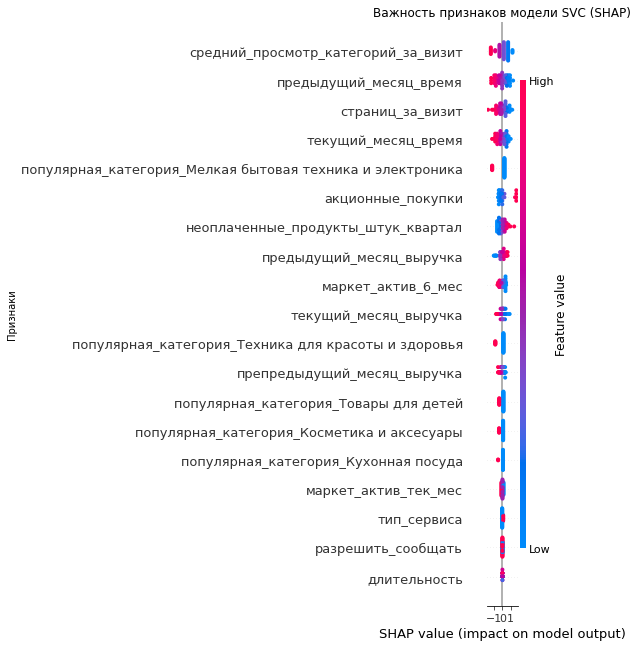

In [89]:
shap.summary_plot(shap_values, X_train_ready.iloc[:50], max_display=25, show=False)

plt.title("Важность признаков модели SVC (SHAP)")
plt.ylabel("Признаки")
plt.tight_layout()
plt.show()

***Выводы по грифуку важности признаков***

1. **Признаки, мало значимые для модели:**

`выручка_предыдущий_месяц` и `выручка_текущий_месяц` имеют меньшую значимость. Это может означать, что выручка за предыдущие месяцы не является ключевым фактором для предсказания покупательской активности или других бизнес-метрик, которые модель пытается предсказать.

`тип_сервиса` (`премиум`/`стандарт`) и `маркет_актив_6_мес` также показали низкую важность. Возможно, эти признаки не играют решающую роль для данного типа модели, и их можно было бы исключить из дальнейшего анализа или попробовать преобразовать в более информативные признаки.

2. **Признаки, которые сильнее всего влияют на целевой признак:**

`средний_просмотр_категорий_за_визит` и `страниц_за_визит` имеют наибольшее влияние. Эти признаки показывают активность пользователя на платформе и могут быть использованы для оптимизации пользовательского опыта. Увеличение вовлеченности через улучшение контента или навигации может повысить покупательскую активность.

`время_предыдущий_месяц` и `время_текущий_месяц` тоже важны. Это может указывать на сезонные или временные колебания покупательской активности, и такие признаки могут быть полезны для предсказания трендов и подготовки к пиковым периодам.

`акционные_покупки` и `неоплаченные_продукты_штук_квартал` также показали значительное влияние на модель, что говорит о важности систем для отслеживания действий клиентов, связанных с акциями и неоплаченными товарами.

3. **Как можно использовать эти наблюдения при моделировании и принятии бизнес-решений:**

    1. `Оптимизация пользовательского интерфейса и контента`: Поскольку `средний_просмотр_категорий_за_визит` и `Страниц_за_визит` оказались важными, бизнес может улучшить пользовательский интерфейс, предложить более релевантные категории и товары, а также работать над улучшением навигации на платформе. Это может привести к увеличению вовлеченности.
    
    2. `Персонализация предложений`: Признаки, такие как `акционные_покупки`, могут помочь в дальнейшем таргетировании акционных предложений и рекомендаций. Например, если клиент часто участвует в акциях, бизнес может предложить ему более выгодные скидки или дополнительные бонусы.

    3. `Управление неоплаченными товарами`: Влияние `неоплаченные_продукты_штук_квартал` показывает, что стоит уделить внимание управлению неоплаченными заказами. Можно создать систему напоминаний или предлагать альтернативные способы оплаты, чтобы снизить число неоплаченных товаров.

### Шаг 8. Сегментация покупателей

#### Выполните сегментацию покупателей. Используйте результаты моделирования и данные о прибыльности покупателей.

#### Выберите группу покупателей и предложите, как увеличить её покупательскую активность: 
 - Проведите графическое и аналитическое исследование группы покупателей.
 - Сделайте предложения по работе с сегментом для увеличения покупательской активности.
 
#### Сделайте выводы о сегментах:
 - какой сегмент вы взяли для дополнительного исследования,
 - какие предложения вы сделали и почему.

In [90]:
best_model = randomized_search.best_estimator_

In [91]:
# Вероятности снижения активности
y_proba = best_model.predict_proba(X_test)[:, 0]

In [92]:
# Добавляем вероятности
X_test['вероятность_снижения_активности'] = y_proba

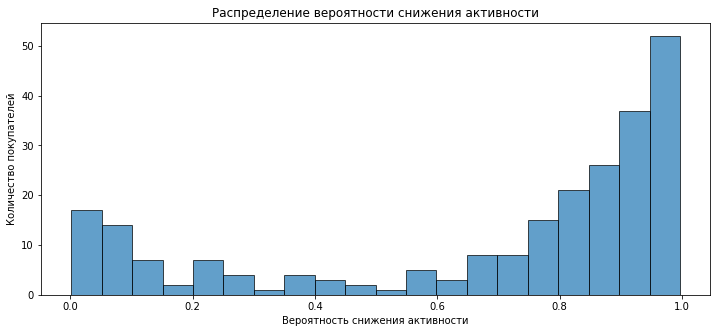

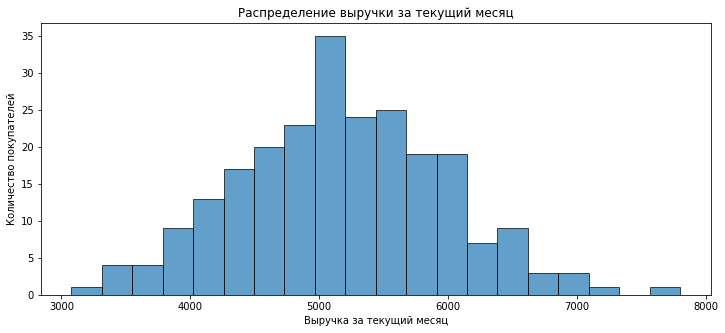

In [93]:
# Распределения. С помощьюних порог подберу

plt.figure(figsize=(12,5))
plt.hist(X_test['вероятность_снижения_активности'], bins=20, alpha=0.7, edgecolor='k')
plt.title('Распределение вероятности снижения активности')
plt.xlabel('Вероятность снижения активности')
plt.ylabel('Количество покупателей')
plt.show()

plt.figure(figsize=(12,5))
plt.hist(X_test['текущий_месяц_выручка'], bins=20, alpha=0.7, edgecolor='k')
plt.title('Распределение выручки за текущий месяц')
plt.xlabel('Выручка за текущий месяц')
plt.ylabel('Количество покупателей')
plt.show()

In [94]:
selected_segment = X_test[X_test['вероятность_снижения_активности'] > 0.5]

In [95]:
revenue_median = X_test['текущий_месяц_выручка'].median()
print("Медиана выручки по тестовой выборке:", revenue_median)

Медиана выручки по тестовой выборке: 5147.0


In [96]:
selected_segment = X_test[(X_test['вероятность_снижения_активности'] > 0.5) &
                          (X_test['текущий_месяц_выручка'] > revenue_median)]

print("Размер выбранного сегмента:", selected_segment.shape[0])

Размер выбранного сегмента: 83


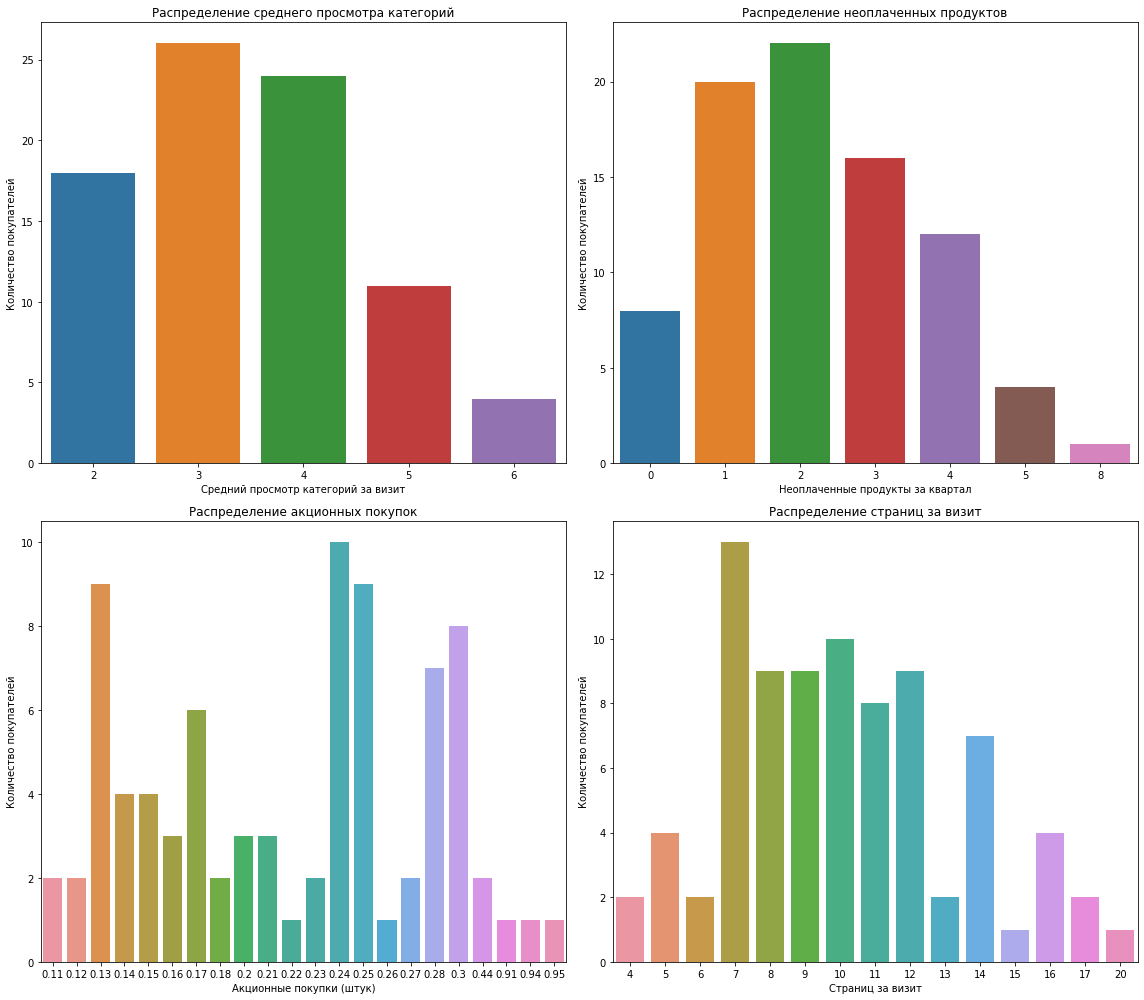

In [105]:
# Посмотрим распределение ключевых признаков

fig, axes = plt.subplots(2, 2, figsize=(16,14))

sns.countplot(data=selected_segment, x='средний_просмотр_категорий_за_визит', ax=axes[0,0])
axes[0,0].set_title('Распределение среднего просмотра категорий')
axes[0,0].set_xlabel('Средний просмотр категорий за визит')
axes[0,0].set_ylabel('Количество покупателей')

sns.countplot(data=selected_segment, x='неоплаченные_продукты_штук_квартал', ax=axes[0,1])
axes[0,1].set_title('Распределение неоплаченных продуктов')
axes[0,1].set_xlabel('Неоплаченные продукты за квартал')
axes[0,1].set_ylabel('Количество покупателей')

sns.countplot(data=selected_segment, x='акционные_покупки', ax=axes[1,0])
axes[1,0].set_title('Распределение акционных покупок')
axes[1,0].set_xlabel('Акционные покупки (штук)')
axes[1,0].set_ylabel('Количество покупателей')


sns.countplot(data=selected_segment, x='страниц_за_визит', ax=axes[1,1])
axes[1,1].set_title('Распределение страниц за визит')
axes[1,1].set_xlabel('Страниц за визит')
axes[1,1].set_ylabel('Количество покупателей')

plt.tight_layout()
plt.show()

In [98]:
mean_revenue = selected_segment['текущий_месяц_выручка'].mean()
mean_activity = selected_segment['средний_просмотр_категорий_за_визит'].mean()

print(f"Средняя выручка в выбранном сегменте: {mean_revenue:.2f}")
print(f"Средняя активность (просмотры категорий за визит): {mean_activity:.2f}")

Средняя выручка в выбранном сегменте: 5746.49
Средняя активность (просмотры категорий за визит): 3.48


***Из данных можно сделать вывод, что:***


3.  **Распределение среднего просмотра категорий**:

    - Значения в основном сосредоточены в диапазоне от `2` до `6` категорий за визит, с пиком около `3–4`.
    - Это говорит о том, что большинство пользователей данного сегмента просматривают сравнительно небольшой, но всё же разнообразный набор категорий за один визит. Они не ограничиваются одной категорией, но и не `гуляют` по очень большому числу категорий.
    - Возможно, интерфейс или ассортимент устроен так, что клиент может относительно быстро найти интересующие его категории, однако глубину и широту просмотра всё ещё можно увеличить.


4.  **Распределение неоплаченных продуктов**:
    
    - Распределение показывает, что основная масса клиентов имеет около `1–5` неоплаченных товаров. Пик приходится на `2`.
    - Это означает, что у данного сегмента существует проблема неоплаченных заказов.
    - Для удержания этого сегмента и повышения конверсии можно улучшить процесс оплаты (добавить удобные способы платежа, напоминания о брошенных корзинах, простые варианты завершения покупки).


5.  **Распределение акционных покупок (штук):**
    
    - Распределение сдвинуто к небольшим значениям — около `0.13–0.4`, примерно `0.24` в среднем. То есть клиенты не очень активно покупают акционные товары или делают это очень эпизодически.
    - Может это говорить о том, что действующие акции недостаточно привлекательны. Требуется более точный подбор акций, персонализированные промо или дополнительные бонусы, чтобы стимулировать интерес к акционным предложениям.


6.  **Распределение страниц за визит:**

    - Диапазон от `4` до `20` страниц, с наибольшей концентрацией примерно в районе `8–12` страниц за визит.
    - Клиенты просматривают достаточно много страниц, что может говорить о том, что они либо ищут что-то конкретное, но не быстро находят, либо им нравится просматривать ассортимент. Однако, чем больше страниц просматривает клиент до совершения покупки, тем выше риск потерять его внимание.


7. **Предложения по повышению покупательской активности:**

   **Персонализированные предложения и акции:**
   
       - Разработать целевые промоакции, основанные на интересах сегмента, предоставляя скидки и бонусы на наиболее просматриваемые категории товаров.
   
   **Улучшение пользовательского опыта:**
   
       - Оптимизировать интерфейс, улучшить рекомендации и облегчить навигацию, чтобы стимулировать клиентов просматривать больше категорий и задерживаться дольше.
   
   **Обратная связь:**
   
       - Собирать мнения и предложения клиентов, чтобы понять причины снижения интереса, и на их основе корректировать ассортимент, маркетинг и условия покупки.

8. **Вывод о сегменте:**

   - Рассматриваемый сегмент — это группа клиентов с умеренно высоким текущим доходом, но высокой вероятностью снижения активности.
   
   - Применение персонализированных акций, улучшение интерфейса и получение обратной связи помогут повысить вовлеченность данного сегмента и сохранить доходы от этих клиентов.


### Шаг 9. Общий вывод

**1. Описание задачи**

Задача заключалась в анализе поведения покупателей, поиске факторов, влияющих на покупательскую активность, и сегментации пользователей для разработки эффективных рекомендаций по увеличению покупательской активности. Для этого необходимо было провести анализ данных, построить прогнозирующие модели и определить наиболее эффективные меры для стимулирования активности разных сегментов покупателей.

**2. Исходные данные и проведенная предобработка**

Были предоставлены четыре датасета:

`market_file`: данные о покупательской активности, характеристиках пользователей, включая тип сервиса, маркетинговую активность и акционные покупки.
`market_time`: данные о времени, проведенном пользователями в различные периоды (текущий и предыдущий месяц).
`market_money`: данные о выручке за текущий и предыдущий месяцы.
`money`: какую прибыль получает магазин от продаж каждому покупателю.
Эти данные были объединены по идентификатору пользователя id, после чего была проведена предобработка:

Пропущенные значения были заполнены средним значением (для количественных переменных).
Категориальные переменные были преобразованы в числовые с помощью метода `One-Hot Encoding`.
Были стандартизированы числовые признаки перед сегментацией и обучением моделей.

**3. Поиск лучшей модели**

Для прогнозирования покупательской активности пользователей было проведено обучение нескольких моделей:

- KNeighborsClassifier
- DecisionTreeClassifier
- LogisticRegression
- SVC

Для каждой модели были применены пайплайны с различными стратегиями предобработки данных и подбора гиперпараметров с использованием `RandomizedSearchCV`. В ходе исследования были подобраны оптимальные гиперпараметры для каждой модели, после чего была выбрана лучшая модель на основе метрики `roc_auc`. `roc_auc` подходит для оценки качества моделей в задаче предсказания покупательской активности. Она обеспечивает меру качества для правильной классификации активности пользователей на два класса: `снизилась активность` и `повышенная активность`. Она устойчива к несбалансированным данным и способна оценить вероятности принадлежности к классу, а также сравнить эффективность различных моделей. Также помогает интерпретировать результаты для бизнес-задачи и максимизировать различие между активными и неактивными покупателями.

**4. Лучшая модель**

Лучшей моделью оказалась `SVC` и гиперпараметром `C = 37.28`. Модель показала высокую метрику на `кросс-валидационной` выборке — `roc_auc = 0.89` и `тренировочных` данных: `25.5` по метрике `SMAPE`, что свидетельствует о хорошей способности модели различать активных и неактивных пользователей.

**5. Сегментация покупателей и выводы**

Для сегментации покупателей была использована модель `SVC` с подобранными гиперпараметрами (C=0.1) и включённой опцией `probability=True`, обеспечивающей оценку вероятностей снижения активности. Благодаря полученным вероятностям и показателям прибыльности (например, выручке за текущий месяц), удалось сформировать сегменты клиентов:

- **Сегмент с высокой вероятностью снижения активности и умеренно-высокой прибыльностью**: Эти клиенты приносят доход, но с высокой вероятностью могут снизить свои покупки. Задача — мотивировать их оставаться активными через адресные меры по повышению вовлечённости.

- **Сегмент с низкой вероятностью снижения активности**: Клиенты, которые стабильно вовлечены. Их можно поощрять с помощью программ лояльности и более индивидуализированных предложений, чтобы увеличить средний чек и частоту покупок.

Выделение этих сегментов помогает лучше понимать структуру клиентской базы и нацелить усилия на удержание наиболее важных сегментов.

**6. Дополнительные предложения для работы с выбранным сегментом**

Для сегмента с высокой вероятностью снижения активности, но при этом приносящим существенный доход, рекомендуется:

1. **Персонализировать промоакции и скидки**: Использовать анализ просмотренных, но не купленных категорий, чтобы предлагать клиентам релевантные скидки и акции.

2. **Улучшить пользовательский опыт**: Оптимизировать интерфейс и навигацию, внедрить более точные рекомендации. Повысить удобство оплаты и упростить процесс оформления заказа, чтобы стимулировать более частые покупки.

3. **Собирать обратную связь**: Понять, почему клиенты потенциально теряют интерес. Опросы, отзывы и анализ поведения помогут улучшить стратегию удержания.

Эти меры позволят снизить вероятность оттока ценной группы клиентов, повысить их лояльность и вовлечённость, а также улучшить общие бизнес-показатели.

**7. Заключение**

Проделанная работа позволила выявить значимые факторы, влияющие на покупательскую активность, разработать эффективные рекомендации по удержанию и стимулированию пользователей, а также улучшить понимание поведения клиентов на основе сегментации. Далее нужно использовать реализацию предложенных мер и отслеживание их эффективности, чтобы оценить улучшение активности и удовлетворенности клиентов.